## Khai báo thư viện và Cấu hình

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import os
import random
# Đảm bảo bạn đã có file data_utils.py cùng thư mục
from data_utils import Multi30kDataset, en_tokenizer, fr_tokenizer

# Cấu hình hiển thị
plt.style.use('ggplot')
print(" Đã nạp thư viện thành công.")

 Đã nạp thư viện thành công.


## Tải và Chuẩn bị Dữ liệu

In [2]:
print("--- ĐANG TẢI DỮ LIỆU ---")


data_dir = os.path.join('data', 'multi30k_en_fr')
train_src = os.path.join(data_dir, 'train.en')
train_trg = os.path.join(data_dir, 'train.fr')


try:
    dataset = Multi30kDataset(train_src, train_trg)
    
    print(f" Đã tải xong dữ liệu!")
    print("-" * 30)
    print(f" Tổng số cặp câu:     {len(dataset)}")
    print(f" Số câu Tiếng Anh:  {len(dataset.src_data)}")
    print(f"Số câu Tiếng Pháp: {len(dataset.trg_data)}")
    print("-" * 30)

except FileNotFoundError as e:
    print(f" Lỗi: {e}")
    print(f"Đường dẫn đang tìm: {os.path.abspath(train_src)}")
except AttributeError:
    print("Lỗi: Không tìm thấy thuộc tính dữ liệu.")

--- ĐANG TẢI DỮ LIỆU ---
 Đã tải xong dữ liệu!
------------------------------
 Tổng số cặp câu:     29000
 Số câu Tiếng Anh:  29000
Số câu Tiếng Pháp: 29000
------------------------------


## Phân tích Độ dài câu (Sentence Length)

Đang tính toán thống kê độ dài...

--- THỐNG KÊ ĐỘ DÀI (Số từ) ---
Tiếng Anh (Src): Min=4, Max=41, Mean=13.11
Tiếng Pháp (Trg): Min=4, Max=54, Mean=14.28


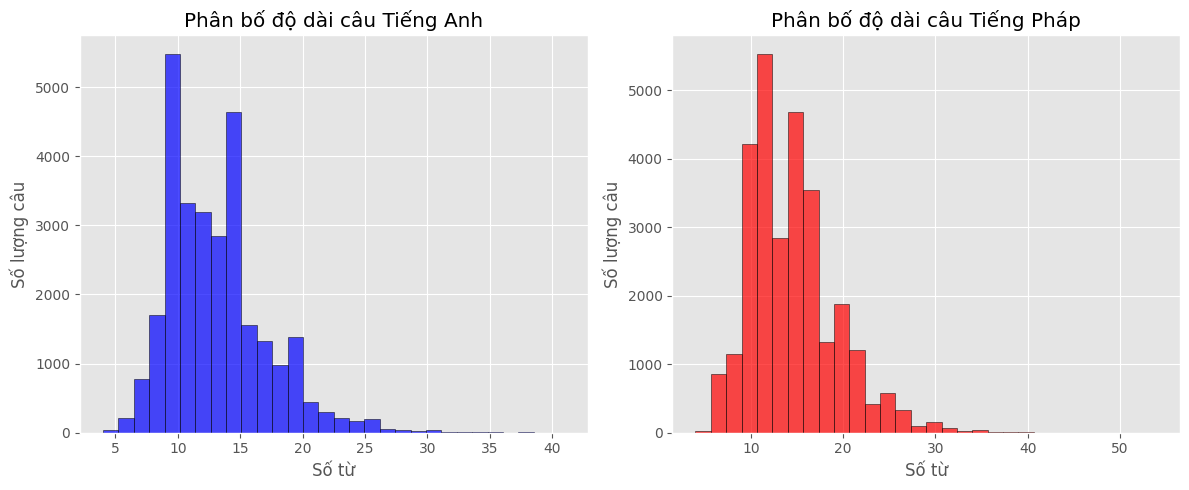

In [3]:
# Tính độ dài các câu
raw_src = dataset.src_data
raw_trg = dataset.trg_data

print("Đang tính toán thống kê độ dài...")

# 2. Tokenize và tính độ dài (số từ) cho từng câu
src_lens = [len(en_tokenizer(sent)) for sent in raw_src]
trg_lens = [len(fr_tokenizer(sent)) for sent in raw_trg]

# 3. In thống kê
print("\n--- THỐNG KÊ ĐỘ DÀI (Số từ) ---")
print(f"Tiếng Anh (Src): Min={min(src_lens)}, Max={max(src_lens)}, Mean={np.mean(src_lens):.2f}")
print(f"Tiếng Pháp (Trg): Min={min(trg_lens)}, Max={max(trg_lens)}, Mean={np.mean(trg_lens):.2f}")

# 4. Vẽ biểu đồ Histogram
plt.figure(figsize=(12, 5))

# Biểu đồ tiếng Anh
plt.subplot(1, 2, 1)
plt.hist(src_lens, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Phân bố độ dài câu Tiếng Anh')
plt.xlabel('Số từ')
plt.ylabel('Số lượng câu')

# Biểu đồ tiếng Pháp
plt.subplot(1, 2, 2)
plt.hist(trg_lens, bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Phân bố độ dài câu Tiếng Pháp')
plt.xlabel('Số từ')
plt.ylabel('Số lượng câu')

plt.tight_layout()
plt.show()

## So sánh độ dài trung bình

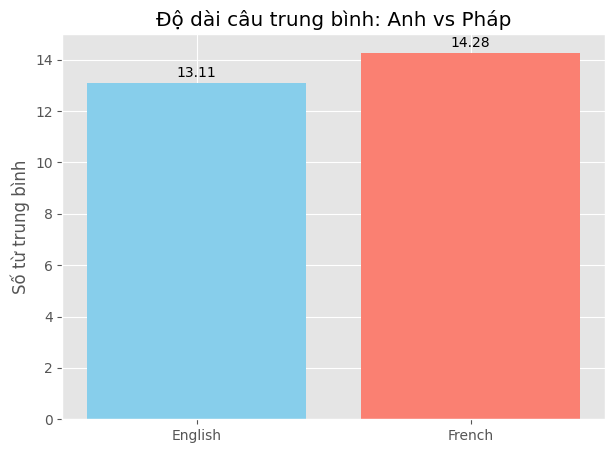

In [4]:
avg_src_len = np.mean(src_lens)
avg_trg_len = np.mean(trg_lens)

plt.figure(figsize=(7, 5))
languages = ['English', 'French']
avg_lengths = [avg_src_len, avg_trg_len]

plt.bar(languages, avg_lengths, color=['skyblue', 'salmon'])
plt.title('Độ dài câu trung bình: Anh vs Pháp')
plt.ylabel('Số từ trung bình')
plt.ylim(bottom=0)

# Thêm số liệu trên cột
for i, v in enumerate(avg_lengths):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

plt.show()

## Phân tích Từ vựng (Vocabulary Frequency)

In [5]:
# Đếm tần suất từ
src_counter = Counter([token for sent in dataset.src_tokenized for token in sent])
trg_counter = Counter([token for sent in dataset.trg_tokenized for token in sent])

print(f"Tổng số từ vựng (Unique) Tiếng Anh: {len(src_counter)}")
print(f"Tổng số từ vựng (Unique) Tiếng Pháp: {len(trg_counter)}")

# Vẽ biểu đồ Top 15 từ phổ biến
def plot_top_words(counter, title, color):
    common = counter.most_common(15)
    words, counts = zip(*common)
    
    plt.figure(figsize=(12, 5))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xlabel('Từ')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_words(src_counter, 'Top 15 từ phổ biến nhất (Tiếng Anh)', 'green')
plot_top_words(trg_counter, 'Top 15 từ phổ biến nhất (Tiếng Pháp)', 'purple')

AttributeError: 'Multi30kDataset' object has no attribute 'src_tokenized'

## Độ che phủ từ vựng & Kiểm tra mẫu

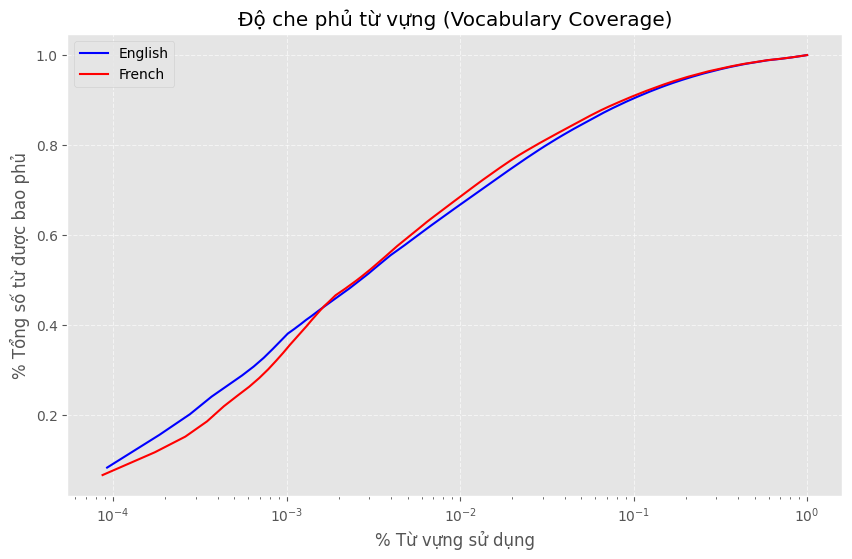


--- VÍ DỤ NGẪU NHIÊN ---
Index: 15427
EN: A happy young girl wearing a brown sweater, pink shirt and blue jeans is jumping off a sidewalk.
FR: Une jeune fille joyeuse portant un sweat marron, un T-shirt rose et un jean saute sur un trottoir.


In [ ]:
# 1. Biểu đồ độ che phủ
def calculate_coverage(counter, total_words):
    vocab_size = len(counter)
    cumulative_count = 0
    coverage = []
    vocab_fraction = []

    for i, (word, count) in enumerate(counter.most_common()):
        cumulative_count += count
        coverage.append(cumulative_count / total_words)
        vocab_fraction.append((i + 1) / vocab_size)
    return coverage, vocab_fraction

total_src_words = sum(src_counter.values())
total_trg_words = sum(trg_counter.values())

cov_en, frac_en = calculate_coverage(src_counter, total_src_words)
cov_fr, frac_fr = calculate_coverage(trg_counter, total_trg_words)

plt.figure(figsize=(10, 6))
plt.plot(frac_en, cov_en, label='English', color='blue')
plt.plot(frac_fr, cov_fr, label='French', color='red')
plt.title('Độ che phủ từ vựng (Vocabulary Coverage)')
plt.xlabel('% Từ vựng sử dụng')
plt.ylabel('% Tổng số từ được bao phủ')
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 2. Kiểm tra ngẫu nhiên 1 cặp câu
print("\n--- VÍ DỤ NGẪU NHIÊN ---")
idx = random.randint(0, len(dataset)-1)
print(f"Index: {idx}")
print(f"EN: {dataset.src_data[idx]}")
print(f"FR: {dataset.trg_data[idx]}")